In [73]:
import matplotlib.pyplot as plt
import numpy as np

h_bar = 1.0545718*10**-34 #hbar
m_e   = 9.10938356*10**-31 #m_e
mu_b  = 9.274009994*10**-24 #mu_b

x0    = 1.22085284*10**-38 #hbar^2/m_e
x1    = 1.60218*10**-22 #meV
x2    = 1.60218*10**-29 #eVÅ
x3    = 1*10*-6 #mum
x4    = 10**7 #k

##### k in 10^7 m^-1 ### m in m_e ### alpha in eVÅ ### B in T ### delta in meV ### mu in meV ### E in meV #####

plt.rc('figure', figsize=[13,7]) #Diagramm size

plt.rc('font', size=12)          # controls default text sizes
plt.rc('axes', titlesize=15)     # fontsize of the axes title
plt.rc('axes', labelsize=15)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=12)    # fontsize of the tick labels
plt.rc('ytick', labelsize=12)    # fontsize of the tick labels
plt.rc('legend', fontsize=12)    # legend fontsize
plt.rc('figure', titlesize=12)  # fontsize of the figure title

def E_minus(k,m,alpha,g,B): #Energeiespectrum E_minus
    return (x0*(k*x4)**2/(2*m)-np.sqrt((alpha*x2*(k*x4))**2+(g*mu_b*B)**2))/x1

def E_plus(k,m,alpha,g,B): #Energeiespectrum E_plus
    return (x0*(k*x4)**2/(2*m)+np.sqrt((alpha*x2*(k*x4))**2+(g*mu_b*B)**2))/x1

def spin_down_minus(k,m,alpha,g,B): #Probability measure spin down for E_minus with respect to z-axis
    if B==0 and k==0:
        return 1
    return 0.5*(1+(g*mu_b*B)/(np.sqrt((g*mu_b*B)**2+(alpha*x2*k*x4)**2)))

def spin_up_minus(k,m,alpha,g,B): #Probability measure spin up for E_minus with respect to z-axis
    if B==0 and k==0:
        return 0
    return 0.5*(1-(g*mu_b*B)/(np.sqrt((g*mu_b*B)**2+(alpha*x2*k*x4)**2)))

def spin_down_plus(k,m,alpha,g,B): #Probability measure spin down for E_plus with respect to z-axis
    if B==0 and k==0:
        return 0
    return 0.5*(1-(g*mu_b*B)/(np.sqrt((g*mu_b*B)**2+(alpha*x2*k*x4)**2)))


def spin_up_plus(k,m,alpha,g,B): #Probability measure spin up for E_plus with respect to z-axis
    if B==0 and k==0:
        return 1
    return 0.5*(1+(g*mu_b*B)/(np.sqrt((g*mu_b*B)**2+(alpha*x2*k*x4)**2)))

def sort_eigenValues(A,absolute=False): #Sorting eigenvalues
    eigenValues, eigenVectors = np.linalg.eigh(A)
    if absolute==True:
        idx = np.argsort(abs(eigenValues))
    if absolute==False:
        idx = np.argsort(eigenValues)
    eigenValues = eigenValues[idx]
    eigenVectors = eigenVectors[:,idx]
    return [eigenValues,eigenVectors]

def Plot_free_electrone(m,start=-9,end=9): #Energiespectrum free electrone
    X = np.linspace(start,end,2500)
    Y = E_minus(X,m,0,0,0)
    plt.plot(X,Y,c='k')
    plt.xlabel('k [$10^7 \cdot m^{-1}$]')
    plt.ylabel('E [meV]')
    plt.grid(linestyle='--')
    plt.show()

def Plot_E_0(m,alpha,start=-9,end=9): #Plot energiespectrum of H_0
    X = np.linspace(start,end,2500)
    Y1 = E_minus(X,m,alpha,0,0)
    Y2 = E_plus(X,m,alpha,0,0)
    plt.plot(X,Y1,c='b',alpha=0)
    plt.plot(X,Y2,c='b',alpha=0)
    plt.plot(X,Y1,c='k')
    plt.plot(X,Y2,c='k')
    plt.xlabel('k [$10^7 \cdot m^{-1}$]')
    plt.ylabel('E [meV]')
    plt.legend(['$m^*$ = %.3f $m_e$'%m,'α    = %.1f eV$\cdot$Å'%alpha],loc="lower left",handlelength=0)
    plt.grid(linestyle='--')
    plt.show()

def Plot_E_1(m,alpha,g,B,plot_spin=False,start=-9,end=9,steps=50): #Plot energiespectrum of H_1
    if plot_spin==False:
        X = np.linspace(start,end,2500)
        Y1 = E_minus(X,m,alpha,g,B)
        Y2 = E_plus(X,m,alpha,g,B)
        plt.plot(X,Y1,c='k')
        plt.plot(X,Y2,c='k')
        plt.plot(X,Y1,c='b',alpha=0)
        plt.plot(X,Y2,c='b',alpha=0)
        plt.xlabel('k [$10^7 \cdot m^{-1}$]')
        plt.ylabel('E [meV]')
        if type(B) == int:
            plt.legend(['$m^*$ = %.3f $m_e$'%m,'α    = %.1f eVÅ'%alpha,'g    = %d'%g,'B    = %d T'%B],loc="lower left",handlelength=0)
        else:
            plt.legend(['$m^*$ = %.3f $m_e$'%m,'α    = %.1f eVÅ'%alpha,'g    = %d'%g,'B    = %.1f T'%B],loc="lower left",handlelength=0)
        plt.show()
    if plot_spin==True:
        A = np.linspace(start,end,steps)
        X = np.linspace(A[1],A[1],25)
        plt.plot(X,E_minus(X,m,alpha,g,B),linewidth=3,alpha=0)
        plt.plot(X,E_minus(X,m,alpha,g,B),linewidth=3,alpha=0)
        plt.plot(X,E_minus(X,m,alpha,g,B),linewidth=3,alpha=0)
        for x in range(steps-1):
            X = np.linspace(A[x],A[x+1],25)
            Y1 = E_minus(X,m,alpha,g,B)
            Y2 = E_plus(X,m,alpha,g,B)
            plt.plot(X,Y1,linewidth=3,c=(1,0,0,spin_up_minus((A[x]+A[x+1])/2,m,alpha,g,B)))
            plt.plot(X,Y1,linewidth=3,c=(0,0,1,spin_down_minus((A[x]+A[x+1])/2,m,alpha,g,B)))
            plt.plot(X,Y2,linewidth=3,c=(1,0,0,spin_up_plus((A[x]+A[x+1])/2,m,alpha,g,B)))
            plt.plot(X,Y2,linewidth=3,c=(0,0,1,spin_down_plus((A[x]+A[x+1])/2,m,alpha,g,B)))
        plt.xlabel('k [$10^7 \cdot m^{-1}$]')
        plt.ylabel('E [meV]')
        if type(B) == int:
            plt.legend(['$m^*$ = %.3f $m_e$'%m,'α    = %.1f eVÅ'%alpha,'g    = %d'%g,'B    = %d T'%B],loc="lower left",handlelength=0)
        else:
            plt.legend(['$m^*$ = %.3f $m_e$'%m,'α    = %.1f eVÅ'%alpha,'g    = %d'%g,'B    = %.1f T'%B],loc="lower left",handlelength=0)
        plt.grid(linestyle='--')
        plt.show()
        
def Plot_Spin_E_minus(m,alpha,g,B,start=-9,end=9): # Plot spin for E_minus with respect to z-axis
    X = np.linspace(start,end,500)
    Y1= [spin_up_minus(i,m,alpha,g,B) for i in X]
    Y2= [spin_down_minus(i,m,alpha,g,B) for i in X]
    plt.plot(X,Y1, 'r',alpha=0)
    plt.plot(X,Y2, 'b',alpha=0)
    plt.plot(X,Y1, 'r',alpha=0)
    plt.plot(X,Y2, 'b',alpha=0)
    plt.plot(X,Y1, 'r')
    plt.plot(X,Y2, 'b')
    plt.xlabel('k [$10^7 \cdot m^{-1}$]')
    plt.ylabel('Probability')
    if type(B) == int:
        plt.legend(['$m^*$ = %.3f $m_e$'%m,'α    = %.1f eVÅ'%alpha,'g    = %d'%g,'B    = %d T'%B],loc="lower left",handlelength=0)
    else:
        plt.legend(['$m^*$ = %.3f $m_e$'%m,'α    = %.1f eVÅ'%alpha,'g    = %d'%g,'B    = %.1f T'%B],loc="lower left",handlelength=0)
    plt.text(-9.5, 1, 'Spin-up: red', {'color': 'r', 'fontsize': 10})
    plt.text(-9.5, .95, 'Spin-down: blue', {'color': 'b', 'fontsize': 10})
    plt.grid(linestyle='--')
    plt.show()
    
def Plot_Spin_E_plus(m,alpha,g,B,start=-9,end=9): # Plot spin for E_plus with respect to z-axis
    X = np.linspace(start,end,500)
    Y1= [spin_up_plus(i,m,alpha,g,B) for i in X]
    Y2= [spin_down_plus(i,m,alpha,g,B) for i in X]
    plt.plot(X,Y1, 'r',alpha=0)
    plt.plot(X,Y2, 'b',alpha=0)
    plt.plot(X,Y1, 'r',alpha=0)
    plt.plot(X,Y2, 'b',alpha=0)
    plt.plot(X,Y1, 'r')
    plt.plot(X,Y2, 'b')
    plt.xlabel('k [$10^7 \cdot m^{-1}$]')
    plt.ylabel('Probability')
    if type(B) == int:
        plt.legend(['$m^*$ = %.3f $m_e$'%m,'α    = %.1f eVÅ'%alpha,'g    = %d'%g,'B    = %d T'%B],loc="lower left",handlelength=0)
    else:
        plt.legend(['$m^*$ = %.3f $m_e$'%m,'α    = %.1f eVÅ'%alpha,'g    = %d'%g,'B    = %.1f T'%B],loc="lower left",handlelength=0)
    plt.text(-9.5, 1, 'Spin-up: red', {'color': 'r', 'fontsize': 10})
    plt.text(-9.5, .95, 'Spin-down: blue', {'color': 'b', 'fontsize': 10})
    plt.grid(linestyle='--')
    plt.show()

def Plot_H_2_Gap(m,alpha_1,alpha_2,alpha_3,g,B,mu,start_delta=0,end_delta=5,steps_delta=200,k_0=True,start_k=-10,end_k=10,steps_k=200): # Plot Band gap of H_2 for delta
    X = np.linspace(start_delta,end_delta,steps_delta)
    Y1 = [2*abs(sort_eigenValues(H_2(0,m,alpha_1,g,B,X[i],mu),absolute=True)[0][0]) for i in range(steps_delta)]
    Y2 = [2*abs(sort_eigenValues(H_2(0,m,alpha_2,g,B,X[i],mu),absolute=True)[0][0]) for i in range(steps_delta)]
    Y3 = [2*abs(sort_eigenValues(H_2(0,m,alpha_3,g,B,X[i],mu),absolute=True)[0][0]) for i in range(steps_delta)]
    if k_0==False:
        K0 = I(start_k,end_k,steps_k,edge_points=True)
        for k0 in range(steps_k):
            for k1 in range(steps_delta):
                Y1[k1] = min(Y1[k1],2*abs(sort_eigenValues(H_2(K0[k0],m,alpha_1,g,B,X[k1],mu),absolute=True)[0][0]))
                Y2[k1] = min(Y2[k1],2*abs(sort_eigenValues(H_2(K0[k0],m,alpha_2,g,B,X[k1],mu),absolute=True)[0][0]))
                Y3[k1] = min(Y3[k1],2*abs(sort_eigenValues(H_2(K0[k0],m,alpha_3,g,B,X[k1],mu),absolute=True)[0][0]))
    plt.plot(X,Y1,'k',alpha=0,label='$m^*$ = %.3f $m_e$'%m)
    plt.plot(X,Y1,'k',alpha=0,label='g    = %d'%g)
    plt.plot(X,Y1,'k',alpha=0,label='B    = %d T'%B)
    plt.plot(X,Y1,'k',alpha=0,label='μ    = %.1f meV'%mu)
    plt.plot(X,Y1,'g',label='α    = %.1f eVÅ'%alpha_1)
    plt.plot(X,Y2,'b',label='α    = %.1f eVÅ'%alpha_2)
    plt.plot(X,Y3,'r',label='α    = %.1f eVÅ'%alpha_3)
    plt.vlines(x=np.sqrt(abs((g*mu_b*B)**2-(mu*x1)**2))/x1, ymin=0, ymax=max(Y1), color = 'k',linestyles='dashed',label="$\sqrt{(g\mu_BB)^2-\mu^2}$")
    plt.xlabel("$\Delta$ [meV]")
    plt.ylabel('E [meV]')
    plt.legend(loc="lower right",handlelength=1)
    plt.grid(linestyle='--')
    plt.show()
    
def Plot_E_H_2(m,alpha,g,B,delta,mu,start=-4,end=4,steps=150):#Energiespectrum H_2
    X = np.linspace(start,end,steps)
    Y1 = [sort_eigenValues(H_2(X[i],m,alpha,g,B,delta,mu),absolute=False)[0][0] for i in range(steps)]
    Y2 = [sort_eigenValues(H_2(X[i],m,alpha,g,B,delta,mu),absolute=False)[0][1] for i in range(steps)]
    Y3 = [sort_eigenValues(H_2(X[i],m,alpha,g,B,delta,mu),absolute=False)[0][2] for i in range(steps)]
    Y4 = [sort_eigenValues(H_2(X[i],m,alpha,g,B,delta,mu),absolute=False)[0][3] for i in range(steps)]
    plt.plot(X,Y4,'k',alpha=0)
    plt.plot(X,Y4,'k',alpha=0)
    plt.plot(X,Y4,'k',alpha=0)
    plt.plot(X,Y4,'k',alpha=0)
    plt.plot(X,Y4,'k',alpha=0)
    plt.plot(X,Y4,'k',alpha=0)
    plt.plot(X,Y1,'k')
    plt.plot(X,Y2,'k')
    plt.plot(X,Y3,'k')
    plt.plot(X,Y4,'k')
    if type(mu) == int:
        if type(B) == int:
            plt.legend(['$m^*$ = %.3f $m_e$'%m,'α    = %.1f eVÅ'%alpha,'g    = %d'%g,'B    = %d T'%B,'Δ    = %.1f meV'%delta,'μ    = %d meV'%mu],loc="lower left",handlelength=0)
        else:
            plt.legend(['$m^*$ = %.3f $m_e$'%m,'α    = %.1f eVÅ'%alpha,'g    = %d'%g,'B    = %.1f T'%B,'Δ    = %.1f meV'%delta,'μ    = %d meV'%mu],loc="lower left",handlelength=0)
    else:
        if type(B) == int:
            plt.legend(['$m^*$ = %.3f $m_e$'%m,'α    = %.1f eVÅ'%alpha,'g    = %d'%g,'B    = %d T'%B,'Δ    = %.1f meV'%delta,'μ    = %.2f meV'%mu],loc="lower left",handlelength=0)
        else:
            plt.legend(['$m^*$ = %.3f $m_e$'%m,'α    = %.1f eVÅ'%alpha,'g    = %d'%g,'B    = %.1f T'%B,'Δ    = %.1f meV'%delta,'μ    = %.2f meV'%mu],loc="lower left",handlelength=0)
    plt.grid(linestyle='--')
    plt.xlabel('k [$10^7 \cdot m^{-1}$]')
    plt.ylabel('E [meV]')
    plt.show()

# Energy-Wavenumber-Plot for a free electrone

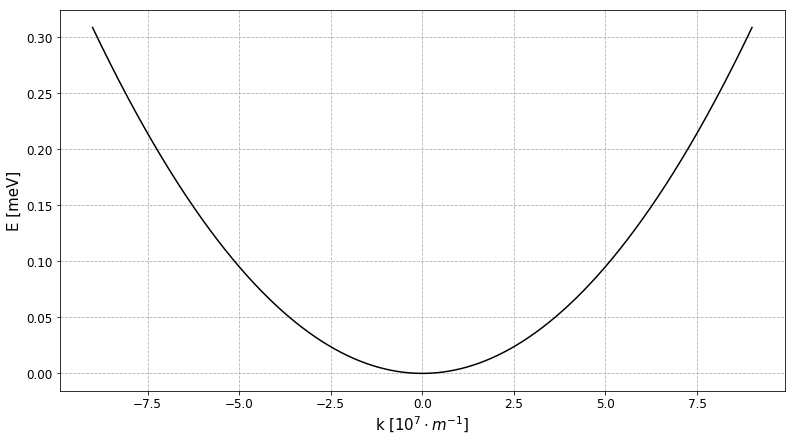

In [3]:
Plot_free_electrone(m=1)

# Energy-Wavenumber-Plot for InAs

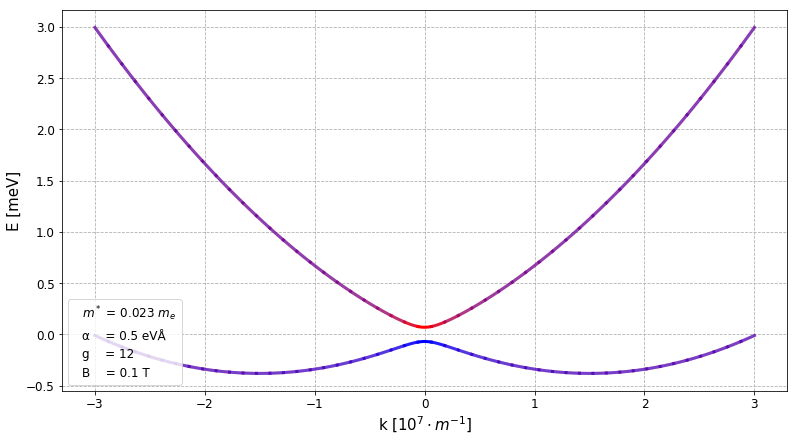

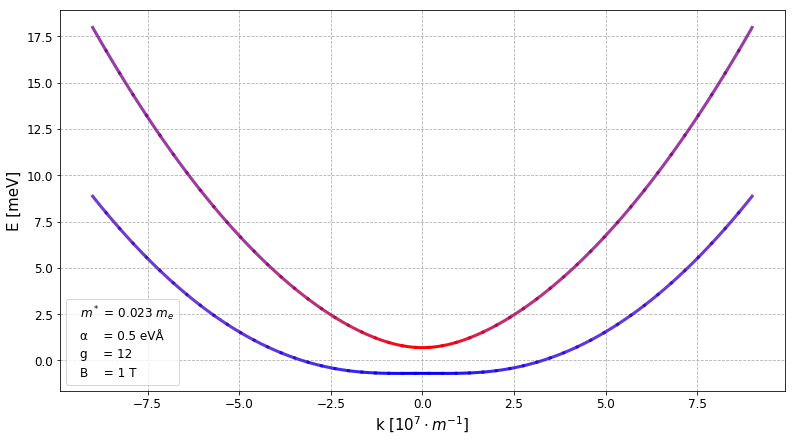

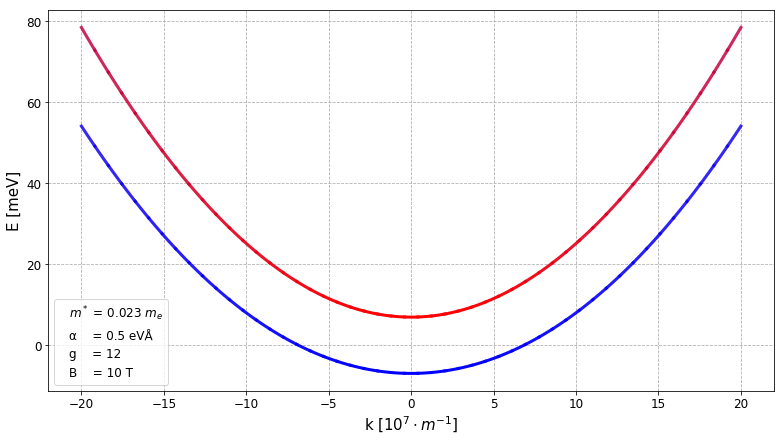

In [38]:
Plot_E_0(m=0.023,alpha=0.5)
Plot_E_1(m=0.023,alpha=0.5,g=12,B=0.1,plot_spin=True,start=-3,end=3,steps=50)
Plot_E_1(m=0.023,alpha=0.5,g=12,B=1,plot_spin=True,start=-9,end=9,steps=50)
Plot_E_1(m=0.023,alpha=0.5,g=12,B=10,plot_spin=True,start=-20,end=20,steps=50)

# Energy-Wavenumber-Plot for InSb

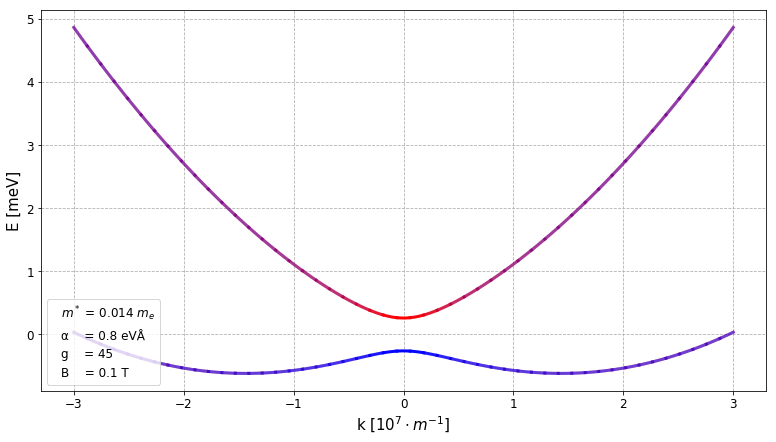

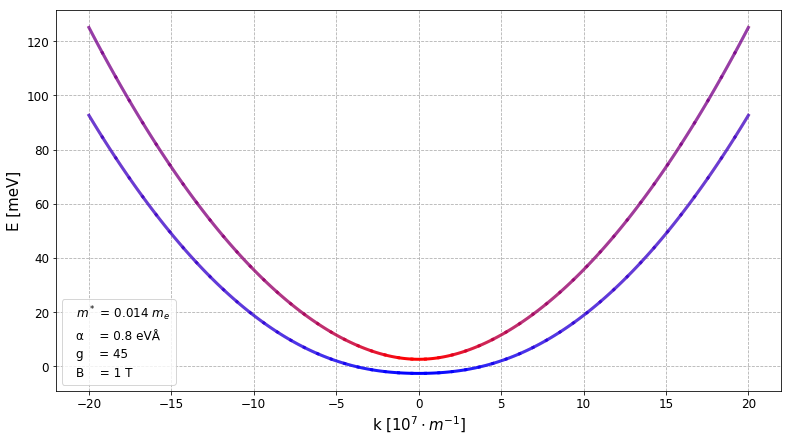

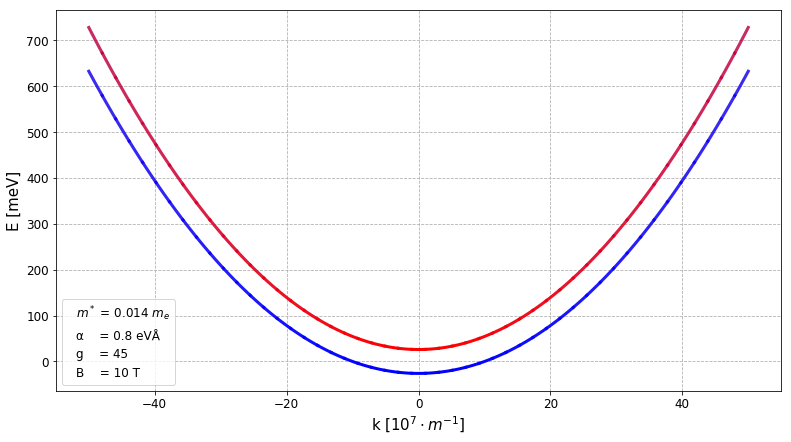

In [40]:
Plot_E_0(m=0.014,alpha=0.6)
Plot_E_1(m=0.014,alpha=0.8,g=45,B=0.1,plot_spin=True,start=-3,end=3,steps=50)
Plot_E_1(m=0.014,alpha=0.8,g=45,B=1,plot_spin=True,start=-20,end=20,steps=50)
Plot_E_1(m=0.014,alpha=0.8,g=45,B=10,plot_spin=True,start=-50,end=50,steps=50)

# Spinorientation of $E_-$

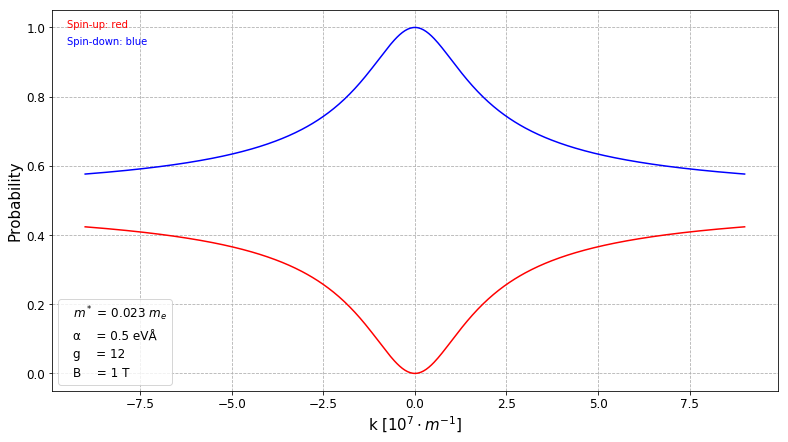

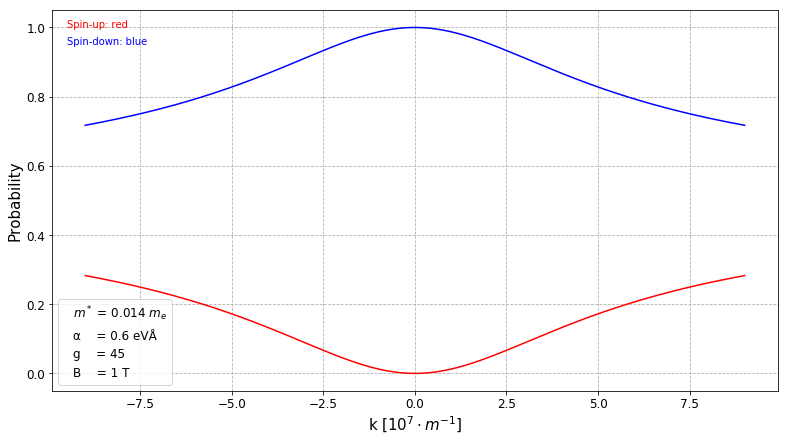

In [76]:
Plot_Spin_E_minus(m=0.023,alpha=0.5,g=12,B=1)
Plot_Spin_E_minus(m=0.014,alpha=0.6,g=45,B=1)

# Spinorientation of $E_+$

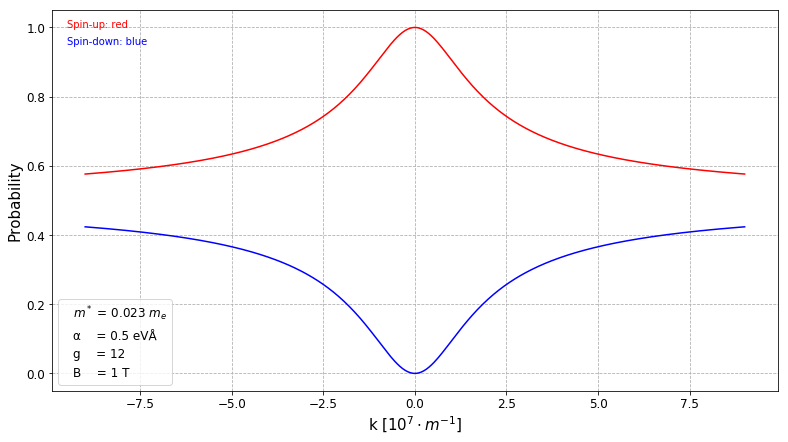

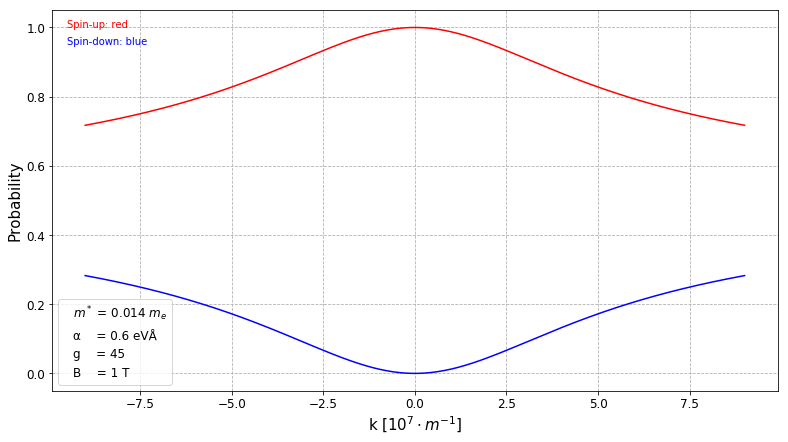

In [75]:
Plot_Spin_E_plus(m=0.023,alpha=0.5,g=12,B=1)
Plot_Spin_E_plus(m=0.014,alpha=0.6,g=45,B=1)

# Band gap $H_2$ for $\Delta$

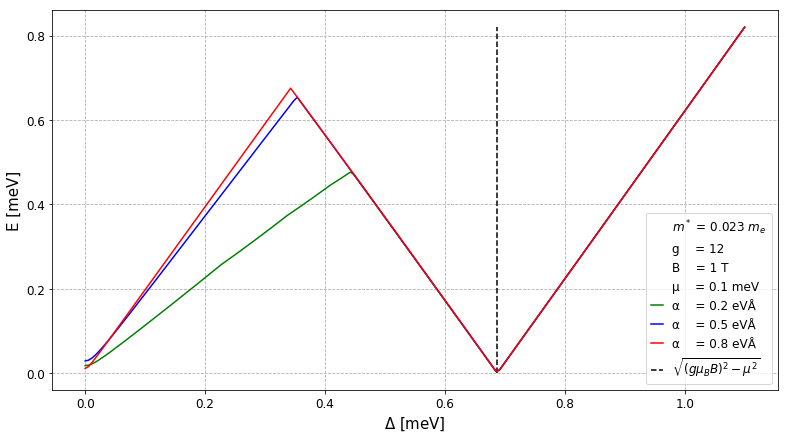

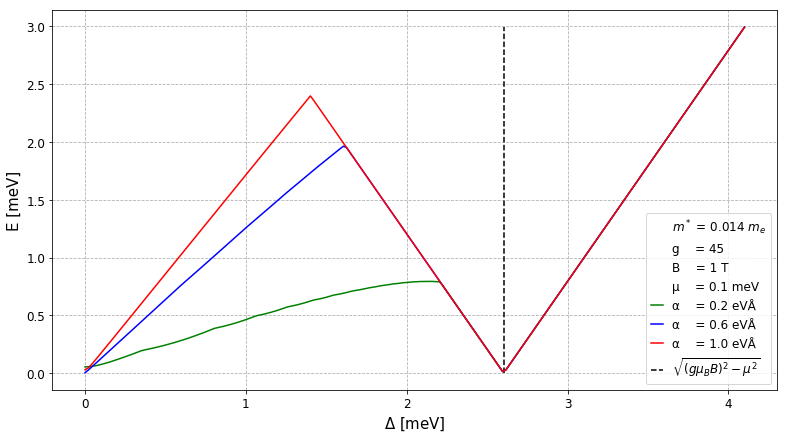

In [77]:
Plot_H_2_Gap(m=0.023,alpha_1=0.2,alpha_2=0.5,alpha_3=0.8,g=12,B=1,mu=0.1,start_delta=0,end_delta=1.1,steps_delta=200,k_0=False,start_k=-30,end_k=30,steps_k=1000)
Plot_H_2_Gap(m=0.014,alpha_1=0.2,alpha_2=0.6,alpha_3=1,g=45,B=1,mu=0.1,start_delta=0,end_delta=4.1,steps_delta=200,k_0=False,start_k=-30,end_k=30,steps_k=1000)

# Energy-Wavenumber-Plot for $H_2$ for InAs/Al

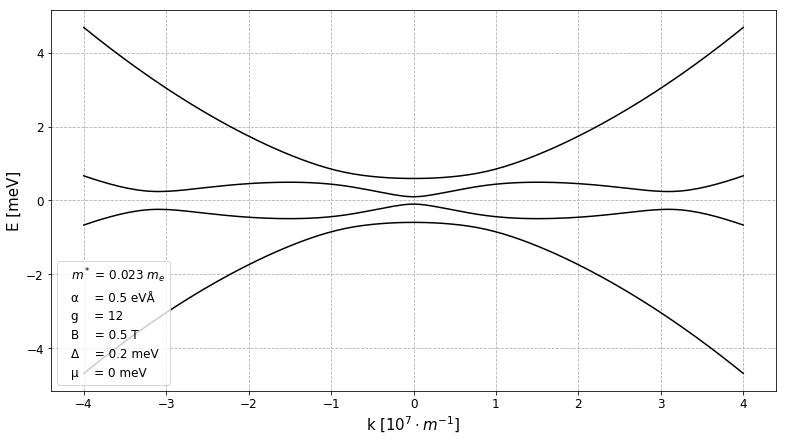

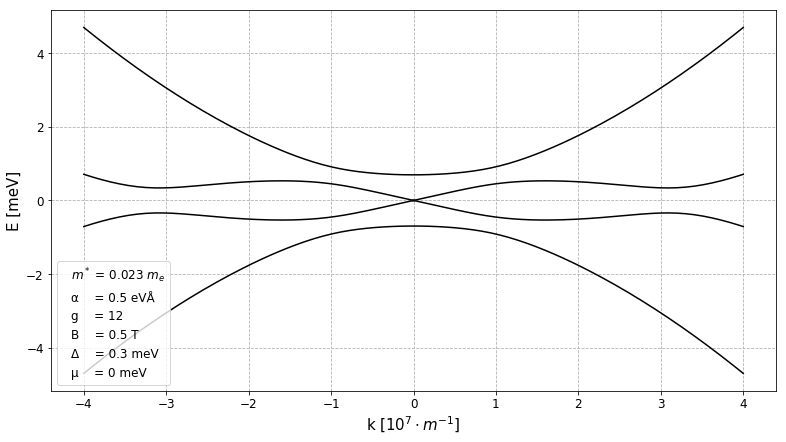

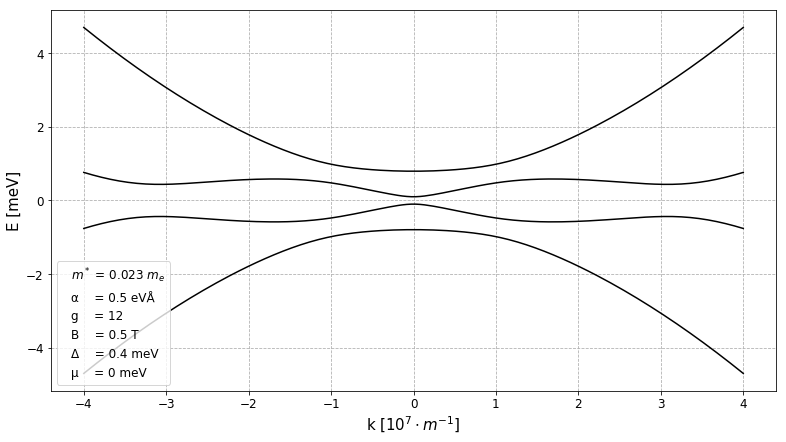

In [62]:
Plot_E_H_2(m=0.023,alpha=0.5,g=12,B=0.5,delta=np.sqrt((12*mu_b*0.5)**2-(0*x1)**2)/x1-0.1,mu=0)
Plot_E_H_2(m=0.023,alpha=0.5,g=12,B=0.5,delta=np.sqrt((12*mu_b*0.5)**2-(0*x1)**2)/x1,mu=0)
Plot_E_H_2(m=0.023,alpha=0.5,g=12,B=0.5,delta=np.sqrt((12*mu_b*0.5)**2-(0*x1)**2)/x1+0.1,mu=0)

# Energy-Wavenumber-Plot for $H_2$ for InSb/Al

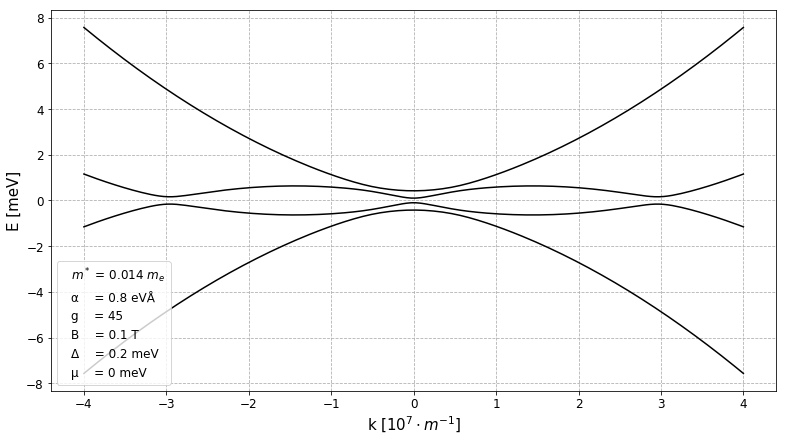

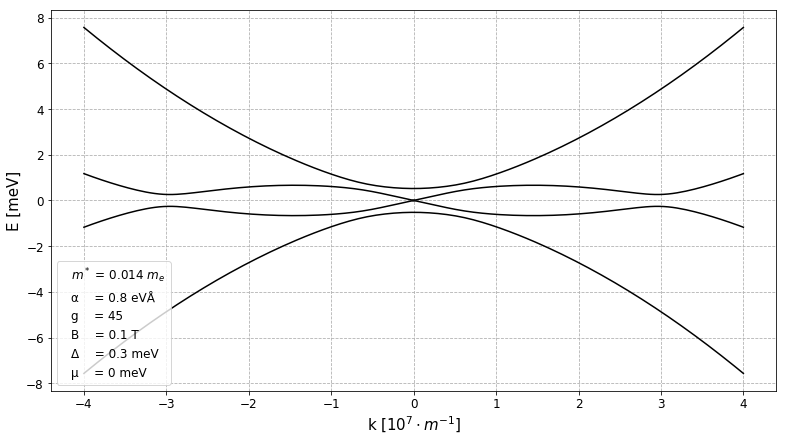

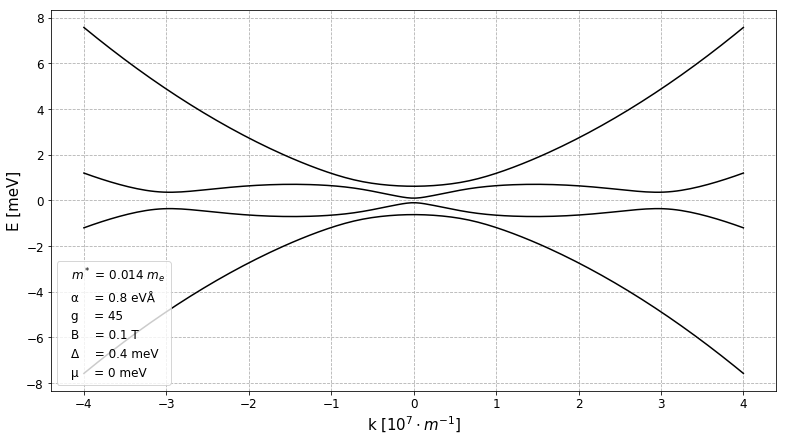

In [60]:
Plot_E_H_2(m=0.014,alpha=0.8,g=45,B=0.1,delta=np.sqrt((45*mu_b*0.1)**2-(0*x1)**2)/x1-0.1,mu=0)
Plot_E_H_2(m=0.014,alpha=0.8,g=45,B=0.1,delta=np.sqrt((45*mu_b*0.1)**2-(0*x1)**2)/x1,mu=0)
Plot_E_H_2(m=0.014,alpha=0.8,g=45,B=0.1,delta=np.sqrt((45*mu_b*0.1)**2-(0*x1)**2)/x1+0.1,mu=0)